In [1]:
pip install pulp

     ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
     --------------------------------------- 0.0/16.4 MB 495.5 kB/s eta 0:00:33
     --------------------------------------- 0.1/16.4 MB 655.4 kB/s eta 0:00:25
     --------------------------------------- 0.1/16.4 MB 774.0 kB/s eta 0:00:21
     --------------------------------------- 0.2/16.4 MB 748.1 kB/s eta 0:00:22
      -------------------------------------- 0.2/16.4 MB 765.3 kB/s eta 0:00:22
      -------------------------------------- 0.3/16.4 MB 749.3 kB/s eta 0:00:22
      -------------------------------------- 0.3/16.4 MB 827.2 kB/s eta 0:00:20
      -------------------------------------- 0.3/16.4 MB 827.2 kB/s eta 0:00:20
      -------------------------------------- 0.3/16.4 MB 700.8 kB/s eta 0:00:23
      -------------------------------------- 0.4/16.4 MB 696.3 k


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Success\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Warehouse Location Optimization for an E-commerce Company

## Internship Task - Optimization Using Linear Programming (PuLP)

### Objective
## To help an e-commerce company optimize its warehouse locations to minimize total shipping costs to cities across the region.

## Here We  use **Linear Programming (LP)** with the `PuLP` library and visualize the warehouse-city network using `matplotlib` and `seaborn`.




In [4]:
pip install pandas


     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     --------------------------------------- 0.0/11.3 MB 435.7 kB/s eta 0:00:26
     --------------------------------------- 0.1/11.3 MB 544.7 kB/s eta 0:00:21
     --------------------------------------- 0.1/11.3 MB 731.4 kB/s eta 0:00:16
      -------------------------------------- 0.2/11.3 MB 919.0 kB/s eta 0:00:13
      -------------------------------------- 0.2/11.3 MB 850.1 kB/s eta 0:00:14
     - -------------------------------------- 0.3/11.3 MB 1.0 MB/s eta 0:00:11
     - -------------------------------------- 0.4/11.3 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.4/11.3 MB 1.1 MB/s eta 0:00:10
     - -------------------------------------- 0.5/11.3 MB 1.1 MB/s eta 0:00:11
     -- ------------------------------------- 0.6/11.3 MB 1.2 MB/s eta 0:00:09
     -- ------------------------------------- 0.6/11.3 MB 1.1 MB/s eta 0:00:10
     -- ------------------------------------- 0.7/11.3


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Success\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn



     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
     ---------- -------------------------- 81.9/294.9 kB 919.0 kB/s eta 0:00:01
     ------------------ ------------------- 143.4/294.9 kB 1.1 MB/s eta 0:00:01
     ----------------------- ------------ 194.6/294.9 kB 985.7 kB/s eta 0:00:01
     ------------------------ ----------- 204.8/294.9 kB 958.4 kB/s eta 0:00:01
     ---------------------------------- - 286.7/294.9 kB 983.9 kB/s eta 0:00:01
     ------------------------------------ 294.9/294.9 kB 867.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Success\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import pulp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [8]:
# List of potential warehouse locations
warehouses = ['W1', 'W2', 'W3']
# List of cities
cities = ['C1', 'C2', 'C3', 'C4', 'C5']
# Fixed cost of operating a warehouse
warehouse_cost = {'W1': 10000, 'W2': 12000, 'W3': 11000}
# Demand from each city (units to ship)
city_demand = {'C1': 80, 'C2': 100, 'C3': 90, 'C4': 70, 'C5': 60}
# Shipping cost from each warehouse to each city
shipping_cost = {
    ('W1', 'C1'): 4, ('W1', 'C2'): 6, ('W1', 'C3'): 9, ('W1', 'C4'): 5, ('W1', 'C5'): 8,
    ('W2', 'C1'): 5, ('W2', 'C2'): 4, ('W2', 'C3'): 7, ('W2', 'C4'): 3, ('W2', 'C5'): 6,
    ('W3', 'C1'): 6, ('W3', 'C2'): 5, ('W3', 'C3'): 4, ('W3', 'C4'): 4, ('W3', 'C5'): 3
}


In [ ]:
# LP problem
prob = pulp.LpProblem("Warehouse_Optimization", pulp.LpMinimize)

# Decision Variables
use_warehouse = pulp.LpVariable.dicts("UseWarehouse", warehouses, cat='Binary')
ship_qty = pulp.LpVariable.dicts("ShipQty", [(w, c) for w in warehouses for c in cities], lowBound=0, cat='Continuous')

# Objective Function: Minimize total cost
prob += (
    pulp.lpSum([warehouse_cost[w] * use_warehouse[w] for w in warehouses]) +
    pulp.lpSum([shipping_cost[(w, c)] * ship_qty[(w, c)] for w in warehouses for c in cities])
), "Total Cost"

# Constraints: Each city's demand must be satisfied
for c in cities:
    prob += pulp.lpSum([ship_qty[(w, c)] for w in warehouses]) == city_demand[c], f"Demand_{c}"

# Constraint: Ship only from open warehouses
for w in warehouses:
    for c in cities:
        prob += ship_qty[(w, c)] <= 1e5 * use_warehouse[w], f"ShipFromOpen_{w}_{c}"


In [10]:
# Solve the problem
prob.solve()

# Print the status and results
print("Status:", pulp.LpStatus[prob.status])
print("Total Cost = $", pulp.value(prob.objective))

for w in warehouses:
    if use_warehouse[w].varValue > 0:
        print(f"Open Warehouse: {w}")
        for c in cities:
            qty = ship_qty[(w, c)].varValue
            if qty > 0:
                print(f"  Ship {qty} units to {c}")


Status: Optimal
Total Cost = $ 12560.0
Open Warehouse: W1
  Ship 80.0 units to C1
  Ship 100.0 units to C2
  Ship 90.0 units to C3
  Ship 70.0 units to C4
  Ship 60.0 units to C5


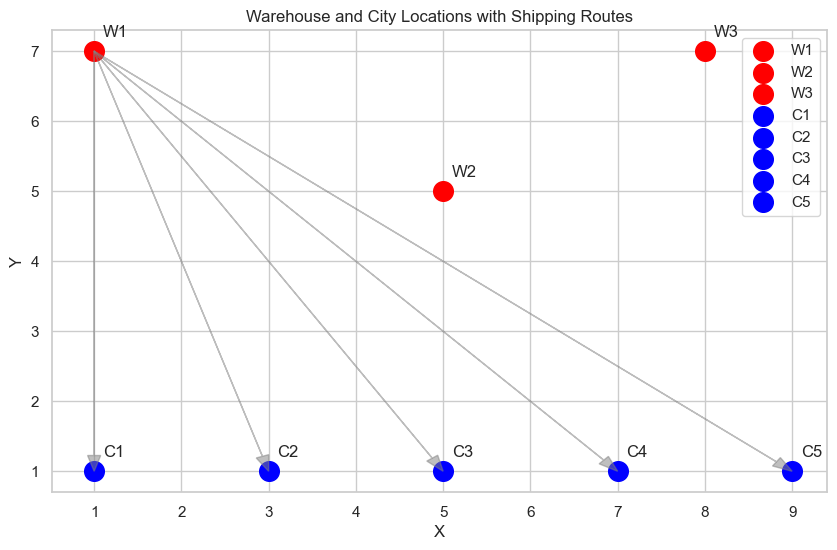

In [ ]:
# Assigning mock coordinates to warehouses and cities
coords = {
    'W1': (1, 7), 'W2': (5, 5), 'W3': (8, 7),
    'C1': (1, 1), 'C2': (3, 1), 'C3': (5, 1), 'C4': (7, 1), 'C5': (9, 1)
}

plt.figure(figsize=(10, 6))
for name, (x, y) in coords.items():
    plt.scatter(x, y, marker='o', s=200, label=name,
                color='red' if name.startswith('W') else 'blue')
    plt.text(x + 0.1, y + 0.2, name, fontsize=12)


for (w, c), var in ship_qty.items():
    if var.varValue > 0:
        x1, y1 = coords[w]
        x2, y2 = coords[c]
        plt.arrow(x1, y1, x2 - x1, y2 - y1, head_width=0.15,
                  length_includes_head=True, color='gray', alpha=0.5)

plt.title("Warehouse and City Locations with Shipping Routes")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
#Insights:

#- Warehouses chosen: Based on fixed and variable cost trade-offs.
#- Demand is met for all cities.
#- Efficient routes selected to minimize shipping and operational costs.
#- Visual map gives insight into geographic feasibility and route optimization.
